20
(256, 256)


(-0.5, 255.5, 255.5, -0.5)

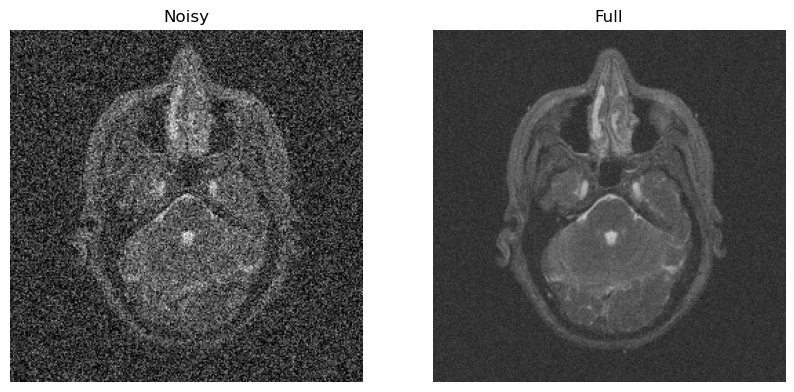

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# A
capture = cv.VideoCapture('MRI-Head.avi')
frames = []
i = 0
frame_numbers = int(capture.get(cv.CAP_PROP_FRAME_COUNT))  # to get the number of frames

for i in range(frame_numbers):
    ret, frame = capture.read()
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    frames.append(gray)
    i += 1
    
capture.release()

print(len(frames))
first_frame_gray = frames[0]
avg_frame = np.average(frames, axis=0).astype(np.uint8)  # axis=0 since it's a list and we want the rows of it
print(avg_frame.shape)
cv.imwrite('Average Frame.png', avg_frame)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax = plt.subplot(1, 2, 1)
ax.set_title('Noisy')
ax.imshow(first_frame_gray, cmap='gray', vmin=0 , vmax = 255)
ax.axis('off')

ax = plt.subplot(1, 2, 2)
ax.set_title('Full')
ax.imshow(avg_frame, cmap='gray', vmin=0 , vmax = 255)
ax.axis('off')


False


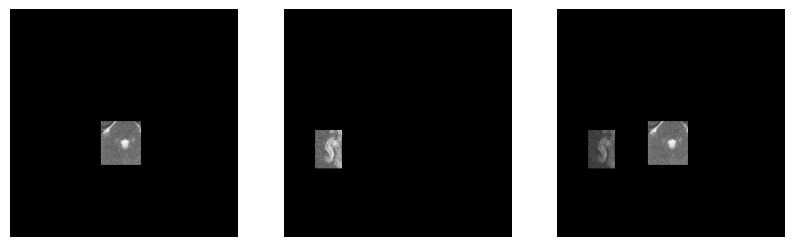

In [3]:
# B
mask1 = np.load('mask1.npy')
mask2 = np.load('mask2.npy')

print(np.min(mask1))

part1 = np.multiply(avg_frame,mask1)
part2 = np.multiply(avg_frame,mask2)
part3 = cv.add(part1, part2)

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax = plt.subplot(1, 3, 1)
ax.imshow(part1 ,cmap='gray')
ax.axis('off')

ax = plt.subplot(1, 3, 2)
ax.imshow(part2, cmap='gray')
ax.axis('off')

ax = plt.subplot(1, 3, 3)
ax.imshow(part3, cmap='gray')
ax.axis('off')

plt.show()